# Pseudo-random number generators

The _random number generators_ (RNG) we find in all programming languages and libraries 
are in fact `pseudo-random number generators`; they are based on an algorithm and therefore have a predictable sequence (and are thus not truly random), but their statistical properties match the ones of random numbers. 

You can read about these algorithms, their limitations and their possible shortcomings in chapter 7 of the book ___Numerical recipes__:

* C version: https://www.cec.uchile.cl/cinetica/pcordero/MC_libros/NumericalRecipesinC.pdf
* Fortran version: https://www.iaa.csic.es/~dani/ebooks/num_rec_book.pdf

Also, this web page contains a lot of information about random numbers, and a generator of ___real___ random numbers:

* https://www.random.org

The RNGs can be tested to check the quality of the sequences they provide. The following resources provide background and tools for the testing of RNGs:

* https://www.random.org/analysis/
* http://webhome.phy.duke.edu/~rgb/General/dieharder.php
* http://simul.iro.umontreal.ca/testu01/tu01.html

## ANSI example of a basic generator

See chapter 7 of "Numerical reciepes". Generates integers between 0 and 32767. 

In the book implementation the code is:

    next = next*1103515245 + 12345 
    
If this implementation is used, the code becomes slower and slower as more integers are generated. With the multiplication the value of `next` increases indefinitely, and the number of bits used by Python to represent it keeps increasing, making the computation slow.

Here I have modified it to:

    next = (next*1103515245)%2**32 + 12345

The `%2**32` imitates the overflowing of a C unsigned long int that will happen with the multiplication.

### Histogram and uniformity test ($\chi^2$)

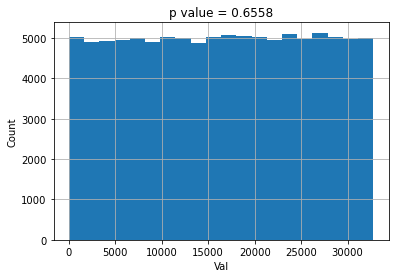

In [3]:
%matplotlib inline
import scipy.stats as scp
import matplotlib.pylab as plt

# Global variable to contain the ongoing generated number
next= 1


# Generator: generates integers between 0 and 32767
def rand():
    global next
    next = (next*1103515245)%2**32 + 12345 
    return (next//65536) % 32768

# Set random seed
def srand(seed):
    global next
    next=seed

    
# Generate a sample and plot histogram
x= []
for i in range(100000):
    x.append(rand())
    
    
# Plot histogram; we use the hist function to recover the counts per bin
h= plt.hist(x,20) # h[0] will be the counts per bin
plt.grid(True)
plt.xlabel('Val')
plt.ylabel('Count')

# Run test
c2_stat, p_val = scp.chisquare(h[0])   

t = plt.title("p value = {:.4f}".format(p_val))